## Adding statistical significance to seaborn plots - By example

## Setup environment

##### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sci_stats
import seaborn as sns

##### A few helper functions

In [2]:
from utils import *

##### A few constants

Define some colors for categories or states plots

In [3]:
subcat_palette = sns.cubehelix_palette(start=0.2)
state_palette = sns.color_palette("Set2")

states_order = ["Successful", "Failed", "Live", "Suspended", "Canceled"]
subcat_order = ['DIY Electronics', '3D Printing', 'Sound']

## Prepare data

In [4]:
dataset = pd.read_csv("kickstarter_projects.csv")
dataset.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


### I like Tech

In [5]:
tech = dataset.loc[(dataset.Category=="Technology"), :]
print_n_projects(tech)

There are 32562 projects in the dataset.


##### Number of projects by `Subcategory`

In [6]:
print_projects_by(tech, "ID", "count")

Technology           6.93e+03
Apps                 6.34e+03
Web                  3.91e+03
Hardware             3.66e+03
Software             3.05e+03
Gadgets              2.96e+03
Wearables            1.23e+03
DIY Electronics      9.02e+02
3D Printing          6.82e+02
Sound                6.69e+02
Robots               5.72e+02
Flight               4.26e+02
Camera Equipment     4.16e+02
Space Exploration    3.23e+02
Fabrication Tools    2.50e+02
Makerspaces          2.38e+02


There are over 30,000 technology projects in the dataset. 
The largest subcategory is `Technology` (no further refined), with almost 7,000 registered projects, while the smallest, `Makerspaces` has 238.

##### Total Goal amounts by `Subcategory`

In [7]:
print_projects_by(tech, "Goal", "sum")

Technology           1.11e+09
Apps                 4.49e+08
Web                  4.00e+08
Hardware             3.43e+08
Software             2.85e+08
Gadgets              1.55e+08
Wearables            7.47e+07
DIY Electronics      1.81e+07
Sound                3.12e+07
3D Printing          3.18e+07
Robots               1.07e+08
Flight               5.93e+07
Camera Equipment     1.66e+07
Space Exploration    1.86e+08
Fabrication Tools    2.90e+07
Makerspaces          3.11e+07


The total objective amount for projects by category follows almost the same ranking, except for `Sound` projects, which have a larger total than 3D Printing projects, even as there are fewer of them.

#### Let's have a closer look to these categories: `DIY Electronics`, `3D Printing`, `Sound` (`d3s`)
I'd like to know more about this apparent difference, don't you ? 

In [8]:
d3s = tech.loc[(tech.Subcategory.isin(("DIY Electronics", "3D Printing", "Sound"))), :]

print_n_projects(d3s, "d3s")

There are 2253 projects in d3s.


#### PLOT 1

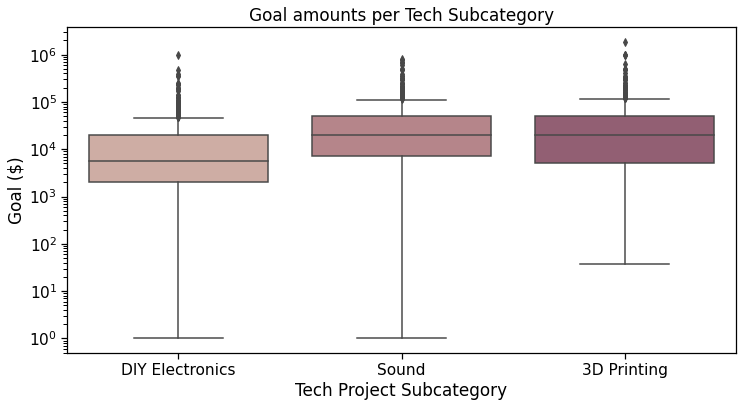

In [9]:
def get_plot1():
    with sns.plotting_context("notebook", font_scale = 1.4):
        ax = get_log_ax()
        sns.boxplot(data=d3s, x='Subcategory', y='Goal', palette=subcat_palette[1:])
        plt.title("Goal amounts per Tech Subcategory")
        label_axes_for_subcat(ax)
        plt.show()
        return ax
ax = get_plot1()

#### PLOT 2

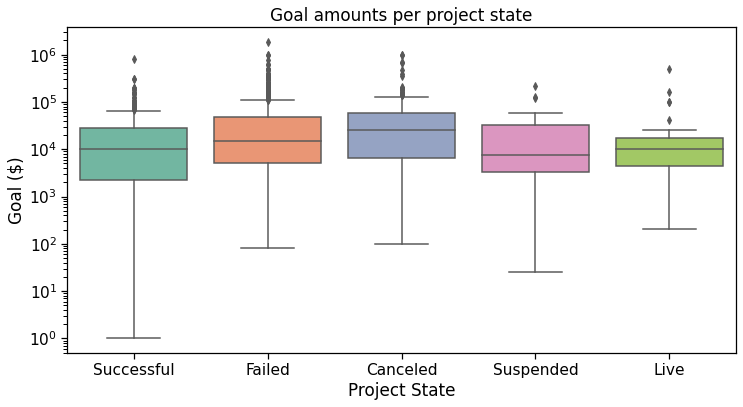

In [10]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    sns.boxplot(data=d3s, x='State', y='Goal', palette=state_palette)
    label_axes_for_state(ax)
    plt.title("Goal amounts per project state")

    plt.show()

#### So, are these values `statistically` different ?

### Prepare arrays for `scipy`

###### By `Subcategory`

In [11]:
electronics = d3s.loc[(d3s.Subcategory == "DIY Electronics"), "Goal"].values
printing = d3s.loc[(d3s.Subcategory == "3D Printing"), "Goal"].values
sound = d3s.loc[(d3s.Subcategory == "Sound"), "Goal"].values

log_electronics = np.log(electronics)
log_printing = np.log(printing)
log_sound = np.log(sound)

describe_array(electronics, "DIY Electronics")
describe_array(printing, "3D Printing")
describe_array(sound, "Sound")
print()
describe_array(log_electronics, "Log(DIY Electronics)")
describe_array(log_printing, "Log(3D Printing)")
describe_array(log_sound, "Log(Sound)")

"DIY Electronics"   Number of projects: 902	Min: 1.00	Max: 1000000.00	Avg: 20044.65	Median: 5.66e+03
"3D Printing"       Number of projects: 682	Min: 37.00	Max: 1853253.00	Avg: 46656.20	Median: 1.97e+04
"Sound"             Number of projects: 669	Min: 1.00	Max: 800000.00	Avg: 46710.19	Median: 2.00e+04

"Log(DIY Electronics)"Number of projects: 902	Min: 0.00	Max: 13.82	Avg: 8.68	Median: 8.64e+00
"Log(3D Printing)"  Number of projects: 682	Min: 3.61	Max: 14.43	Avg: 9.68	Median: 9.89e+00
"Log(Sound)"        Number of projects: 669	Min: 0.00	Max: 13.59	Avg: 9.79	Median: 9.90e+00


#### Test normality

In [12]:
print("DIY Electronics: ", sci_stats.normaltest(electronics))
print("3D printing: ", sci_stats.normaltest(printing))
print("Sound: ", sci_stats.normaltest(sound))
print()
print("Log(electronics): ", sci_stats.normaltest(log_electronics))
print("Log(3D printing): ", sci_stats.normaltest(log_printing))
print("Log(Sound): ", sci_stats.normaltest(log_sound))

DIY Electronics:  NormaltestResult(statistic=1521.3743649696216, pvalue=0.0)
3D printing:  NormaltestResult(statistic=1082.2551732301945, pvalue=9.801106931556437e-236)
Sound:  NormaltestResult(statistic=709.4121986641935, pvalue=8.976320746933668e-155)

Log(electronics):  NormaltestResult(statistic=13.803140782976556, pvalue=0.0010062040534031388)
Log(3D printing):  NormaltestResult(statistic=25.224644013193576, pvalue=3.330720181625079e-06)
Log(Sound):  NormaltestResult(statistic=97.03273110503234, pvalue=8.503743627935909e-22)


That's mostly no, let's apply Mann Whitney U test

In [13]:
print("DIY Electronics vs 3D Printing: ", sci_stats.mannwhitneyu(electronics, printing))
print("3D printing vs Sound: ", sci_stats.mannwhitneyu(printing, sound))
print("Electronics vs Sound: ", sci_stats.mannwhitneyu(electronics, sound))

DIY Electronics vs 3D Printing:  MannwhitneyuResult(statistic=200995.5, pvalue=1.419609145909443e-32)
3D printing vs Sound:  MannwhitneyuResult(statistic=219168.5, pvalue=0.1056416590528228)
Electronics vs Sound:  MannwhitneyuResult(statistic=184904.0, pvalue=9.572393650682216e-40)


Remember the plot

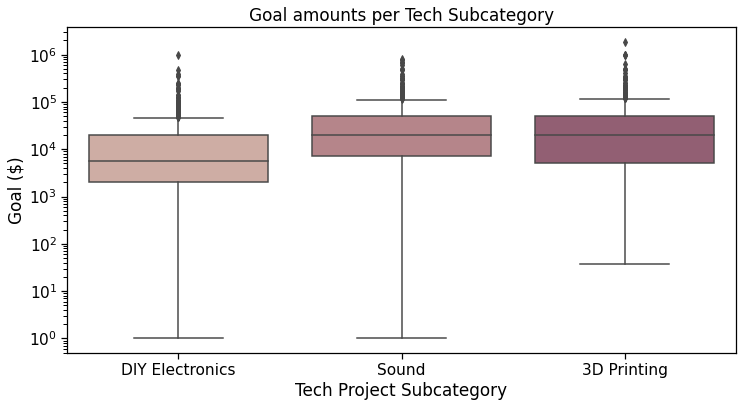

In [14]:
ax = get_plot1()

So how to add the statistical significance (pvalues) on there ?
There are a few options that you could find, requiring to code quite a few lines. You'll find them if you look for them.

Instead, I'm going to present you `statannotations`.

## What is `statannotations` ?

`Statannotations` is a packaged that evolved from `statannot`, providing an improved API and added features to add statistical significance annotations onto seaborn categorical plots (`barplot`, `boxplot`, `stripplot`, `swarmplot`, and `violinplot`)

How so ?

###### First and foremost

In [15]:
from statannotations.Annotator import Annotator

The general pattern is

1. Instanciate an Annotator (or reuse, i'll cover that later).


2. Configure it (text formatting, statistical test, multiple comparisons correction method...)


3. Make the annotations (we'll cover these cases)

    - By applying a configured test
    - By providing pvalues to format
    - By providing completely custom annotation


4. Annotate !

### Let's use our test results, since we have them

So we already have a seaborn plot and its associated `ax`, and statistical results. Let's make the Annotator.  
In this step, you have to pass which boxes (or bars, violins, etc) you want to annotate in a `box_pairs` parameter.  
In this case, it is the equivalent of `'DIY Electronics vs 3D printing'` and others.

For statannotations, you specify this as 
```python
box_pairs = [('DIY Electronics', '3D Printing'), 
             ('3D Printing', 'Sound'),
             ('DIY Electronics', 'Sound')]
```
**STEP 1**: The annotator
```python
annotator = Annotator(ax, box_pairs, ...)  # With ... = all parameters passed to seaborn's plotter
```

**STEP 2**: In this first example, we will not configure anything.  

**STEP 3**: We'll then add the raw pvalues from scipy's returned values, using
```python 
annotator.set_custom_annotations(pvalues)
```
**STEP 4**: Annotate !
```python
annotator.annotate()
```
! Make sure the order of box pairs and annotations (pvalues here) match

p-value annotation legend:
ns: p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



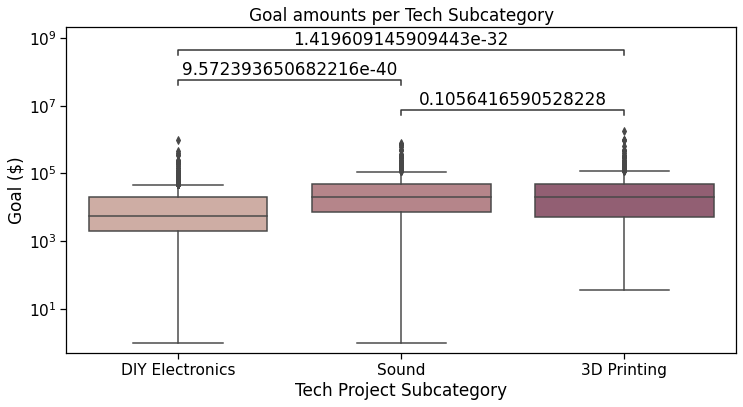

In [16]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    # Putting the parameters in a dictionary avoids duplication
    plotting_parameters = {
        'data': d3s,
        'x': 'Subcategory',
        'y': 'Goal',
        'palette': subcat_palette[1:]
    }
    
    box_pairs = [('DIY Electronics', '3D Printing'), 
             ('3D Printing', 'Sound'),
             ('DIY Electronics', 'Sound')]
    
    # pvalues with scipy:
    pvalues = [sci_stats.mannwhitneyu(electronics, printing).pvalue,
               sci_stats.mannwhitneyu(printing, sound).pvalue,
               sci_stats.mannwhitneyu(electronics, sound).pvalue]
    
    
    sns.boxplot(**plotting_parameters)

    annotator = Annotator(ax, box_pairs, **plotting_parameters)
    annotator.set_custom_annotations(pvalues)
    annotator.annotate()
    plt.title("Goal amounts per Tech Subcategory")
    label_axes_for_subcat(ax)

    plt.show()


###### And that plot by `State` ?

In [18]:
for state in states_order:
    values = d3s.loc[(d3s.State == state), "Goal"].values
    describe_array(values, state)
    print(sci_stats.normaltest(values))
    log_values = np.log(values)
    describe_array(log_values, f"Log({state})")
    print(sci_stats.normaltest(log_values))
    print("\n")

"Successful"        Number of projects: 933	Min: 1.00	Max: 800000.00	Avg: 22195.41	Median: 1.00e+04
NormaltestResult(statistic=1458.9137220178004, pvalue=0.0)
"Log(Successful)"   Number of projects: 933	Min: 0.00	Max: 13.59	Avg: 8.90	Median: 9.21e+00
NormaltestResult(statistic=63.90130331674805, pvalue=1.3304798192714246e-14)


"Failed"            Number of projects: 983	Min: 80.00	Max: 1853253.00	Avg: 43982.37	Median: 1.50e+04
NormaltestResult(statistic=1487.6422281065556, pvalue=0.0)
"Log(Failed)"       Number of projects: 983	Min: 4.38	Max: 14.43	Avg: 9.55	Median: 9.62e+00
NormaltestResult(statistic=7.136849338810638, pvalue=0.028200243413094073)


"Live"              Number of projects: 31	Min: 202.00	Max: 500000.00	Avg: 36678.16	Median: 1.00e+04
NormaltestResult(statistic=62.01996907134057, pvalue=3.408276595231509e-14)
"Log(Live)"         Number of projects: 31	Min: 5.31	Max: 13.12	Avg: 9.14	Median: 9.21e+00
NormaltestResult(statistic=1.4257806434605207, pvalue=0.4902252391643135

### Boxplots with hue

We are also going to work on these two plots of the same data

#### PLOT 3

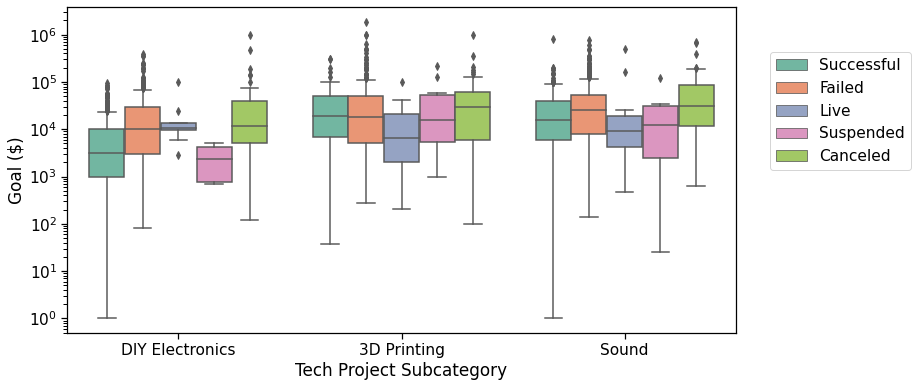

In [19]:
with sns.plotting_context("notebook", font_scale = 1.4):

    ax = get_log_ax()
    ax = sns.boxplot(data=d3s, 
                     x='Subcategory', y='Goal', 
                     order=subcat_order,
                     hue="State", 
                     hue_order=states_order, 
                     palette=state_palette)

    add_legend(ax)
    label_axes_for_subcat(ax)
    plt.show()

#### PLOT 4 

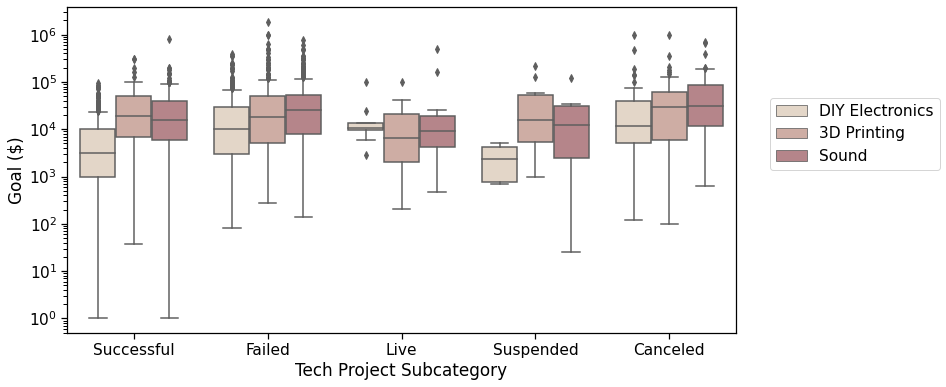

In [20]:
with sns.plotting_context("notebook", font_scale = 1.4):

    ax = get_log_ax()
    ax = sns.boxplot(data=d3s, 
                     x='State', y='Goal', 
                     order=states_order,
                     hue="Subcategory", 
                     hue_order=subcat_order, 
                     palette=subcat_palette)

    add_legend(ax)
    label_axes_for_subcat(ax)
    plt.show()

## Annotating